In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data

ModuleNotFoundError: No module named 'numpy'

In [ ]:
start = '2010-01-01'
end = '2024-12-31'

df = data.DataReader('AAPL', 'stooq', start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-31,252.163,253.002,249.156,250.145,39524126
2024-12-30,251.953,253.222,250.475,251.923,35596636
2024-12-27,257.547,258.416,252.782,255.309,42401889
2024-12-26,257.906,259.814,257.347,258.736,27292958
2024-12-24,255.209,257.926,255.010,257.916,23260251


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.33224,6.38003,6.29142,6.37983,530786106
2010-01-07,6.37037,6.38003,6.29093,6.33718,565387425
2010-01-06,6.45138,6.47712,6.34179,6.34840,652802003
2010-01-05,6.46388,6.48813,6.41768,6.45138,713715946
2010-01-04,6.42488,6.45501,6.39166,6.44034,583191777


In [ ]:
df = data.DataReader('AAPL', 'stooq', start, end)
if isinstance(df, pd.DataFrame):
    original_df = df
    df = original_df.reset_index()
    print(df.head())
else:
    print("Error: df is not a Pandas DataFrame. Check the output of data.DataReader()")

        Date     Open     High      Low    Close    Volume
0 2024-12-31  252.163  253.002  249.156  250.145  39524126
1 2024-12-30  251.953  253.222  250.475  251.923  35596636
2 2024-12-27  257.547  258.416  252.782  255.309  42401889
3 2024-12-26  257.906  259.814  257.347  258.736  27292958
4 2024-12-24  255.209  257.926  255.010  257.916  23260251


In [ ]:
df = df.drop(['Date'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,252.163,253.002,249.156,250.145,39524126
1,251.953,253.222,250.475,251.923,35596636
2,257.547,258.416,252.782,255.309,42401889
3,257.906,259.814,257.347,258.736,27292958
4,255.209,257.926,255.010,257.916,23260251


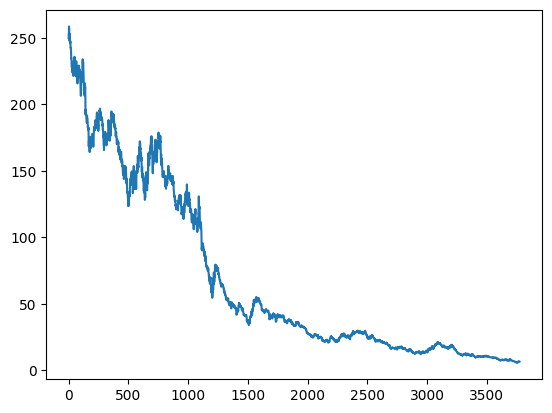

In [ ]:
plt.plot(df.Close)

In [ ]:
df


,Date,Open,High,Low,Close,Volume
0,2024-12-31,252.16300,253.00200,249.15600,250.14500,39524126
1,2024-12-30,251.95300,253.22200,250.47500,251.92300,35596636
2,2024-12-27,257.54700,258.41600,252.78200,255.30900,42401889
3,2024-12-26,257.90600,259.81400,257.34700,258.73600,27292958
4,2024-12-24,255.20900,257.92600,255.01000,257.91600,23260251
...,...,...,...,...,...,...
3769,2010-01-08,6.33224,6.38003,6.29142,6.37983,530786106
3770,2010-01-07,6.37037,6.38003,6.29093,6.33718,565387425
3771,2010-01-06,6.45138,6.47712,6.34179,6.34840,652802003
3772,2010-01-05,6.46388,6.48813,6.41768,6.45138,713715946


In [ ]:
#rolling function ma= moving average
ma100 = df.Close.rolling(100).mean()
ma100


,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,6.873427
3770,6.857361
3771,6.842359
3772,6.829572


<function matplotlib.pyplot.show(close=None, block=None)>

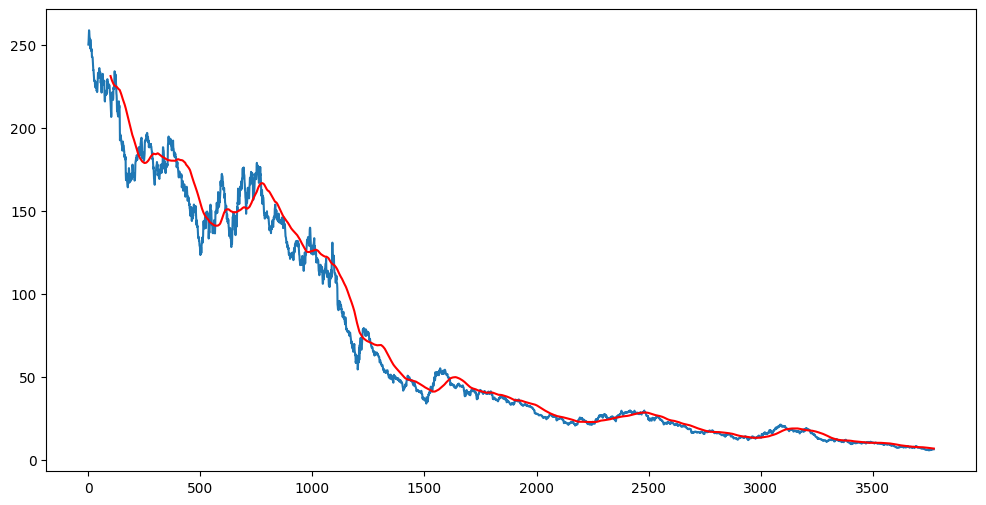

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df.Close)
plt.plot(df.index, ma100, 'r')
plt.show


In [ ]:
ma200 = df.Close.rolling(200).mean()
#first 200 values will be null,from 201 value will be there
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,7.445681
3770,7.431102
3771,7.416269
3772,7.401799


<function matplotlib.pyplot.show(close=None, block=None)>

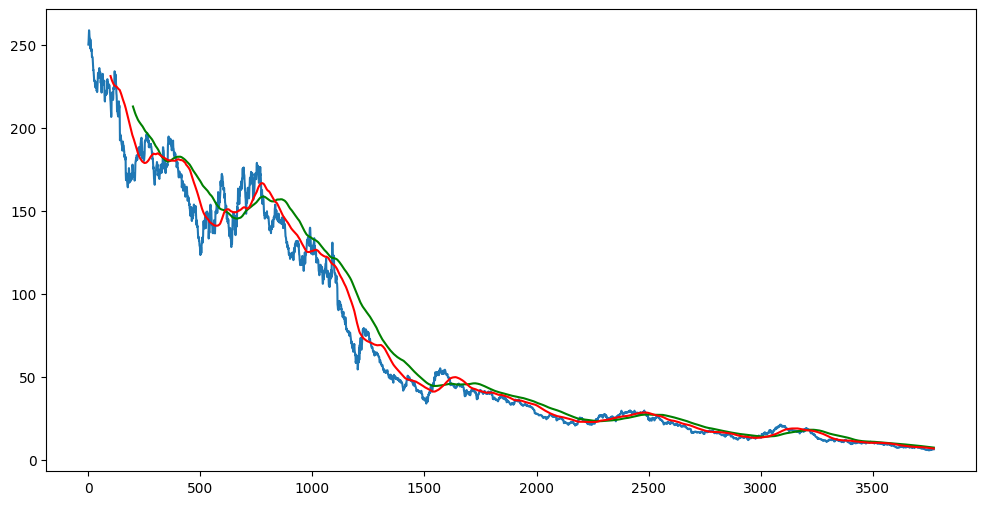

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df.Close)
plt.plot(df.index, ma200, 'g')
plt.plot(df.index, ma100, 'r')
plt.show

In [ ]:
df.shape

(3774, 6)

In [ ]:
#Splitting data into training and testing
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)
#training data is used to train the ml model,helping it learn patterns and relationships.
#testing is used to evaluate how well the trained model performs on unseen data, to generalize new info.
#[0:int(len(df))* is called slicing.

(2641, 1)
(1133, 1)


In [ ]:
data_training.head()

,Close
0,250.145
1,251.923
2,255.309
3,258.736
4,257.916


In [ ]:
data_testing.head()

,Close
2641,20.7220
2642,20.6029
2643,20.6108
2644,20.4805
2645,20.2727


In [ ]:
#for lstm, we can't give training and testing data.
#we should scale down the data. 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [ ]:
#fitting training data and converting into an array
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.96393667],
       [0.97140036],
       [0.98561413],
       ...,
       [0.00213416],
       [0.00209722],
       [0.00266812]])

In [ ]:
data_training_array.shape

(2641, 1)

In [ ]:
#divinding data into x train and y train
#1-100 x; 101-y(predicted)
#if y-112, x-11-111
x_train=[] #2 empty list to store
y_train=[]
for i in range(100,data_training_array.shape[0]): #2641 is at index 0
    x_train.append(data_training_array[i-100:i]) #slice of 100 previous stock prices
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
#x- hold the input data for training the model. It's designed to contain a sequence of past stock prices.
#y- hold the target data or the "answers" for the model. It contains the stock price that the model should predict based on the input

In [ ]:
x_train.shape

(2541, 100, 1)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 298ms/step - loss: 0.0481
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 286ms/step - loss: 0.0071
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - loss: 0.0047
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 302ms/step - loss: 0.0038
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - loss: 0.0037
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 0.0036
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 287ms/step - loss: 0.0035
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 288ms/step - loss: 0.0036
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - loss: 0.0033
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0032
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 283ms/step - loss: 0.0031
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - loss: 0.0033
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - loss: 0.0027
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 287ms/step - loss: 0.0029
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:
model.save('keras_model.keras')

NameError: name 'model' is not defined

In [ ]:
data_testing.head()

,Close
2641,20.7220
2642,20.6029
2643,20.6108
2644,20.4805
2645,20.2727


In [ ]:
data_training.tail(100) #these r the 100 values which we need to put in testing
# data to append

,Close
2541,26.3868
2542,25.9088
2543,25.8734
2544,25.5038
2545,25.6902
...,...
2636,20.9873
2637,20.9477
2638,21.0246
2639,21.0158


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
#final_df=past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
# Use pd.concat to combine DataFrames instead of append

In [ ]:
final_df.head() #testingdata

,Close
0,26.3868
1,25.9088
2,25.8734
3,25.5038
4,25.6902


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.        ],
       [0.97680457],
       [0.97508675],
       ...,
       [0.02761663],
       [0.03261384],
       [0.03207811]])

In [ ]:
input_data.shape

(1233, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1133, 100, 1)
(1133,)


In [ ]:
#making predictions
y_predicted = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step


In [ ]:
y_predicted.shape

(1133, 1)

In [ ]:
y_test

array([0.72510992, 0.71933048, 0.71971383, ..., 0.02761663, 0.03261384,
       0.03207811])

In [ ]:
y_predicted

array([[0.7309735 ],
       [0.731526  ],
       [0.7313099 ],
       ...,
       [0.05262968],
       [0.05300169],
       [0.05341521]], dtype=float32)

In [ ]:
scaler.scale_

array([0.048526])

In [ ]:
scale_factor= 1/0.048526
y_predicted= y_predicted * scale_factor
y_test=y_test*scale_factor

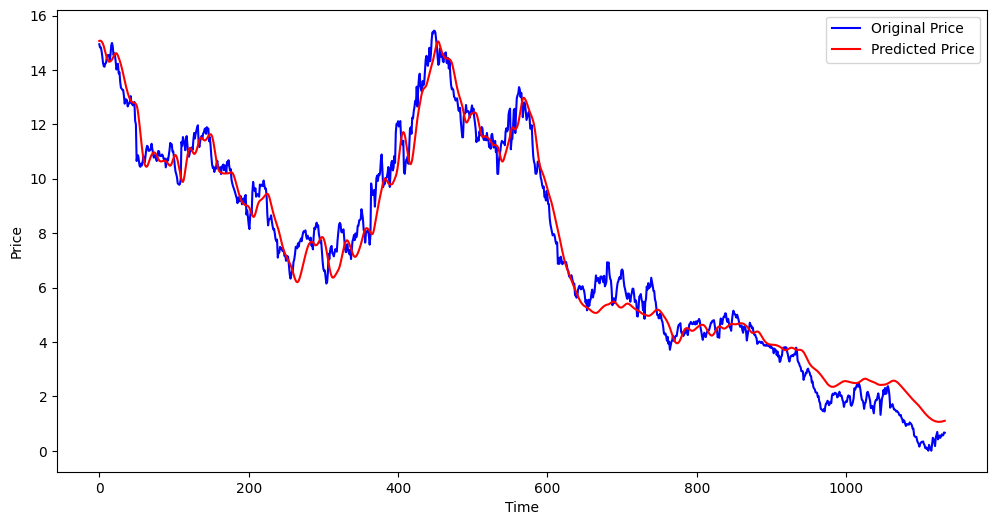

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show() #as u can see predicted and test values r so nicely matching